<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices

1. **Modelo de encriptación**

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamaño de la matriz de código, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje.

La persona que debe recibir el mensaje conoce la matriz de código. El o ella arrglan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el número de elementos en una fila conicide con el tamaño de la matriz de código multiplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588,

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?



In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
# Matriz del mensaje
M = np.matrix([[ 47,49,-19,257,487],
        [10,-9,63,137,236],
        [ 79,142,-184,372,536],
        [ 59,70,-40,332,588]])
M = sp.Matrix(M)
M

Matrix([
[47,  49,  -19, 257, 487],
[10,  -9,   63, 137, 236],
[79, 142, -184, 372, 536],
[59,  70,  -40, 332, 588]])

In [3]:
# Matriz de codificación
N = np.matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])


N = sp.Matrix((np.linalg.inv(N)).round(10).astype(int))
N

Matrix([
[14,  1, -2,  1,  -5],
[22, -7, -4,  6, -19],
[13, -3, -2,  3, -10],
[-2,  1,  1, -1,   2],
[-2,  0,  0,  0,   1]])

In [4]:
# Matriz decifrada
Mat_men = M*N
Mat_men

Matrix([
[ 1, 18,  5, 27, 25],
[15, 21, 27,  8,  1],
[22,  9, 14,  7, 27],
[ 6, 21, 14, 27, 27]])

In [5]:
Mat_men = M*N
Mat_men

letras = "ABCDEFGHIJKLMNOPQRSTUVWXYZ "

mensaje = ""
for row in range(np.shape(Mat_men)[0]):
    for colum in range(np.shape(Mat_men)[1]):
        A = Mat_men[row, colum]
        if 1 <= A <= 26:
            mensaje += letras[A - 1]
        else:
            mensaje += ' '

print(mensaje)

ARE YOU HAVING FUN  


2. Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresión lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial, para determinar el conjunto de parámetros de la regresión. En este último caso, la regresión lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y $y$ los valos esperados, así, si tenemos una conjunto de datos en N dimensiones; la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por :


- Sea $\vec{X}=x^{(1)}, x^{(2)}, x^{(3)}, x^{(4)}, ..., x^{(m)}$
- Sea $\vec{Y}=y^{(1)}, y^{(2)}, y^{(3)}, y^{(4)}, ..., y^{(m)}$

(el  super índice es la componente del vector). Para determinar la ecuación de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{(i)} = \theta_1 x^{(i)} + \theta_0$ la anterior expresión puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{(1)} & x_1^{(2)} & \cdots & x_1^{(m)} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde:
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{(1)} \\
1 & x_1^{(2)} \\
\vdots & \vdots \\
1 & x_1^{(m)}
\end{bmatrix}
\end{equation}

y


\begin{equation}
y=
\begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots\\
y^{(m)}
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos:
```python
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional:


```python
N = 10
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```


In [6]:
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise

Los valores para Theta son :  Theta 0 = 0.39028466167481835 y Theta 1 = 0.7890447456333491


matrix([[0.39028466, 0.78904475]])

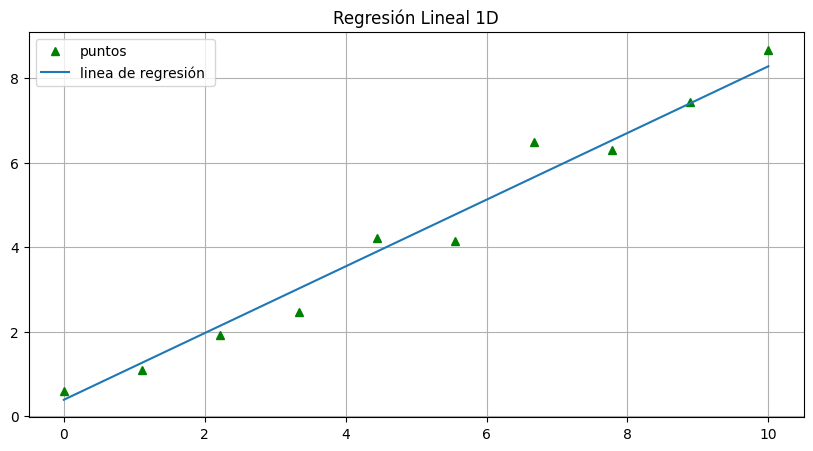

In [7]:
# Funcion de regresion lineal en 1D
def regre_1D(x1,y):
  # arreglo de unos
  unos = np.ones(N)

  # Transpuesta de la Matriz X
  XT = np.matrix([unos,x1]).round().astype(int)

  Y = np.matrix([y])

  # se tranpone las matriz Y, para que quede como en el jercicio osea que sea de dimensiones (10,1)
  YT = Y.T

  # Matriz X
  X = np.transpose(XT)

  #Multiplicacion de X por su transùesta

  mul = np.dot(XT,X)

  #Inversa de la multiplicacion de X por su transuesta

  Inv = np.linalg.inv(mul)

  # valores de Theta

  theta = Inv*XT*YT

  THETA = theta.T

  Y2 = THETA[0,0] + x1*THETA[0,1]

  regre = np.dot(THETA,XT)
  regre

  plt.figure(figsize=(10,5))
  plt.title("Regresión Lineal 1D")
  plt.plot(x1,y,"g^", label = "puntos")
  plt.plot(x1,Y2,label = "linea de regresión ")
  plt.legend()
  plt.grid()

  print("Los valores para Theta son : ","Theta 0 =",theta[0,0], "y" , "Theta 1 =" ,theta[1,0])

  return THETA


theta = regre_1D(x1,y)
theta

In [8]:
#para 2D
N = 100
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100)

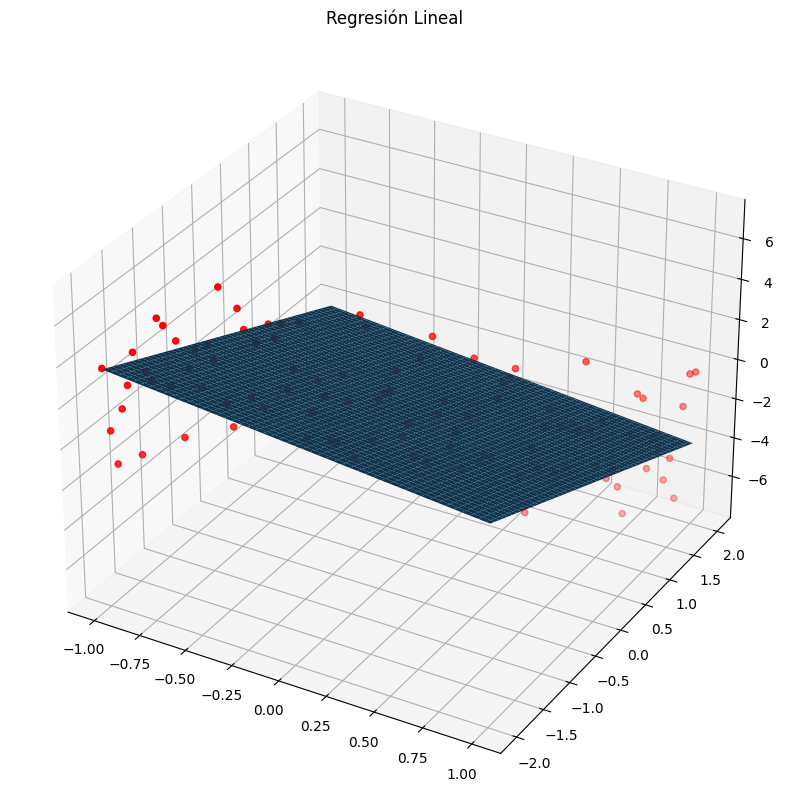

In [9]:
# Funcion de regresion lineal en 2D
def regre_2D(x1,x2,y):
  unos = np.ones(N)

  # Transpuesta de la Matriz X
  XT = np.matrix([unos,x1,x2]).round().astype(int)

  # Matriz X
  X = XT.T

  Y = np.matrix([y])
  # se tranpone las matriz Y, para que quede como en el jercicio osea que sea de dimensiones (10,1)
  YT = Y.T

  Mul = np.dot(XT,X)

  Inv = np.linalg.inv(Mul)

  theta = Inv*XT*YT
  THETA = theta.T

  X1, X2 = np.meshgrid(x1,x2)
  Y2 = THETA[0,0] + X1*THETA[0,1] + X2*THETA[0,2]

  # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  # plt.title("Regresión Lineal")
  # surf = ax.plot_surface(X1, X2, Y2,label = "Plano de regresión ")
  # scatter = ax.scatter(x1, x2, Y,"-",color = "red", label = "puntos")
  # # plt.legend()

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(111, projection='3d')
  plt.title("Regresión Lineal")
  surf = ax.plot_surface(X1, X2, Y2, label="Plano de regresión")
  scatter = ax.scatter(x1, x2, Y, "-", color="red", label="Puntos")




  return THETA

theta = regre_2D(x1,x2,y)